In [69]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv("Q1_data.csv")
df.head()

,Unnamed: 0,symbol,name,time_stamp,time_high,time_low,open,close,high,low,market_cap,volume
0,0,BTC,Bitcoin,2023-05-17T23:59:59.999Z,2023-05-17T20:09:00.000Z,2023-05-17T14:03:00.000Z,27035.470130,27398.802028,27465.927904,26600.144844,5.308901e+11,1.514001e+10
1,1,BTC,Bitcoin,2023-05-13T23:59:59.999Z,2023-05-13T18:50:00.000Z,2023-05-13T00:32:00.000Z,26807.769044,26784.078561,27030.482960,26710.873803,5.188737e+11,9.999172e+09
2,2,BTC,Bitcoin,2023-03-08T23:59:59.999Z,2023-03-08T00:23:00.000Z,2023-03-08T23:43:00.000Z,22216.442321,21718.079830,22268.896252,21708.050506,4.194214e+11,2.253658e+10
3,3,BTC,Bitcoin,2023-02-21T23:59:59.999Z,2023-02-21T08:30:00.000Z,2023-02-21T22:06:00.000Z,24833.048914,24436.354485,25126.851686,24200.364116,4.715777e+11,3.125210e+10
4,4,BTC,Bitcoin,2022-10-15T23:59:59.999Z,2022-10-15T03:59:00.000Z,2022-10-15T23:04:00.000Z,19185.437304,19067.635082,19212.541608,19019.250125,3.657224e+11,1.619224e+10


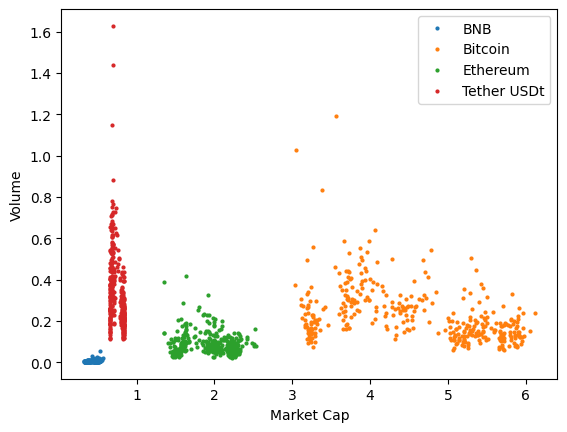

In [50]:
coins = df.groupby('name')
fig, ax = plt.subplots()
ax.margins(0.05)
for name, group in coins:
    ax.plot(group.market_cap / 10**11 , group.volume / 10**11 , marker='o', linestyle='', ms=2, label=name)
ax.legend()
plt.xlabel("Market Cap")
plt.ylabel("Volume")
plt.show()

In [80]:
data = df[['market_cap','volume']]
data.head()

,market_cap,volume
0,5.308901e+11,1.514001e+10
1,5.188737e+11,9.999172e+09
2,4.194214e+11,2.253658e+10
3,4.715777e+11,3.125210e+10
4,3.657224e+11,1.619224e+10


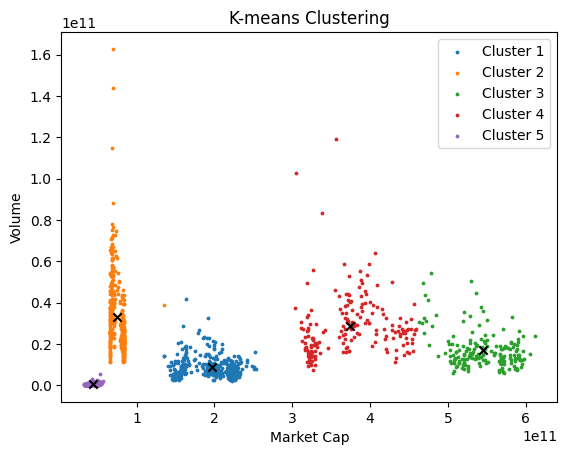

In [92]:
kmeans_data = data.copy()
kmeans = KMeans(n_clusters=5, random_state=0, n_init=10)
kmeans.fit(kmeans_data)
labels = kmeans.labels_
kmeans_data['Cluster'] = labels
centers = kmeans.cluster_centers_

# Plot the data points
for i in range(5):
    plt.scatter(kmeans_data[kmeans_data['Cluster'] == i]['market_cap'], kmeans_data[kmeans_data['Cluster'] == i]['volume'], label=f'Cluster {i+1}', s=3)

# Plot the cluster centers
for i in range(5):
    plt.scatter(centers[i][0], centers[i][1], color='black', marker='x')

plt.xlabel('Market Cap')
plt.ylabel('Volume')
plt.title('K-means Clustering')
plt.legend()
plt.show()

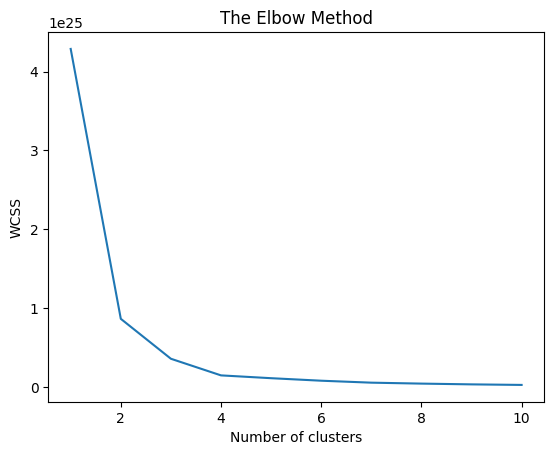

In [79]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init=10)
    kmeans.fit(kmeans_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

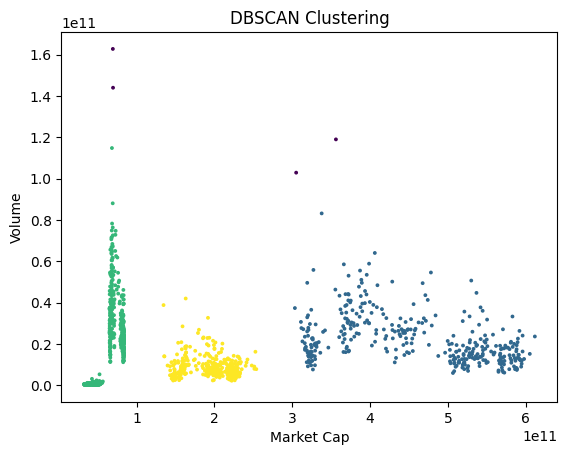

In [90]:
data_normalized = (data / 10**11)
dbscan = DBSCAN(eps=0.3, min_samples=5).fit(data_normalized)
labels = dbscan.labels_
dbscan_data.loc[:, 'Cluster'] = labels
plt.scatter(dbscan_data['market_cap'], dbscan_data['volume'], c=labels, s=3)
plt.xlabel('Market Cap')
plt.ylabel('Volume')
plt.title('DBSCAN Clustering')
plt.show()